In [20]:
import json
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

def procesar_linea_json(linea):
    inicio_json = linea.find('{')
    contenido_json = linea[inicio_json:]
    #contenido_json_limpio = contenido_json.replace('\\', '')
    #contenido_json_limpio = contenido_json_limpio.replace('\"', '"')
    #print(contenido_json)
    return json.loads(contenido_json)

def procesar_archivo(ruta_archivo):
    datos = []
    with open(ruta_archivo, 'r') as archivo:
        for linea in archivo:
            datos_agente = procesar_linea_json(linea)
            datos.append(datos_agente)
    return datos

def procesar_archivos(directorio):
    datos_totales = []
    for archivo in os.listdir(directorio):
        if archivo.endswith('.log'):
            ruta_completa = os.path.join(directorio, archivo)
            datos_archivo = procesar_archivo(ruta_completa)
            for dato in datos_archivo:
                estado_agente = dato.get('state', '{}')
                # Asegurarse de que estado_agente sea un diccionario
                if isinstance(estado_agente, str):
                    estado_agente = json.loads(estado_agente)
                estado_agente['nombre_agente'] = dato.get('name', 'Desconocido')
                datos_totales.append(estado_agente)
    
    df = pd.DataFrame(datos_totales)
    return df

def calculos(data):
    # Asegurándose de que 'money' es numérico
    data['money'] = pd.to_numeric(data['money'], errors='coerce')
    
    # Calculando el promedio de 'money' agrupado por 'nombre_agente'
    promedio_money_por_agente = data.groupby('nombre_agente')['money'].mean()
    desviacion_estandar_money = data.groupby('nombre_agente')['money'].std()
    coeficiente_variacion_money_por_agente = (desviacion_estandar_money / promedio_money_por_agente) * 100
    
    # Mostrar los resultados agrupados
    print("Promedio por Agente:\n", promedio_money_por_agente)
    print("\nDesviación Estándar por Agente:\n", desviacion_estandar_money)
    print("\nCoeficiente de Variación por Agente (%):\n", coeficiente_variacion_money_por_agente)

    # Calculando el promedio total y la varianza de 'money'
    promedio_total_money = data['money'].mean()
    varianza_money = data['money'].var()
    
    # Mostrar los resultados totales
    print("\nPromedio total de 'money':", promedio_total_money)
    print("Varianza de 'money':", varianza_money)


def graficar(data):
    # Asegúrate de que 'df' es tu DataFrame y ya contiene las columnas 'nombre_agente' y 'money'.
    # Si 'money' aún no es numérico, conviértelo
    data['money'] = pd.to_numeric(data['money'], errors='coerce')
    
    # Crear un gráfico de bigotes (boxplot) para visualizar la distribución de 'money' para cada 'nombre_agente'
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='nombre_agente', y='money', data=data)
    
    plt.title('Distribución de Dinero por Agente')
    plt.xlabel('Agente')
    plt.ylabel('Dinero')
    plt.xticks(rotation=45)
    plt.show()

In [18]:
!pip install seaborn


  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/2d/46/cf3fce41ffc543b6e94dadbe6b647559d591df446ec716e72c3b4ce71b34/seaborn-0.13.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 3.2 MB/s eta 0:00:00 MB/s eta 0:00:0101


In [13]:
dfEmotions = procesar_archivos('test01/')
calculos(dfEmotions)

Promedio por Agente:
 nombre_agente
PeasantFamily_1    1494072.2
PeasantFamily_2    1632230.2
PeasantFamily_3    2021538.2
PeasantFamily_4    1476641.0
PeasantFamily_5    1640211.0
Name: money, dtype: float64

Desviación Estándar por Agente:
 nombre_agente
PeasantFamily_1    532380.074178
PeasantFamily_2    641813.130908
PeasantFamily_3    531806.338242
PeasantFamily_4    621693.039082
PeasantFamily_5    704506.052093
Name: money, dtype: float64

Coeficiente de Variación por Agente (%):
 nombre_agente
PeasantFamily_1    35.632821
PeasantFamily_2    39.321239
PeasantFamily_3    26.307014
PeasantFamily_4    42.101841
PeasantFamily_5    42.952160
Name: money, dtype: float64

Promedio total de 'money': 1652938.52
Varianza de 'money': 350328578586.76


In [12]:
dfNOEmotions = procesar_archivos('test02/')
calculos(dfNOEmotions)

Promedio por Agente:
 nombre_agente
PeasantFamily_1    1.522125e+06
PeasantFamily_2    1.453583e+06
PeasantFamily_3    1.510734e+06
PeasantFamily_4    1.307384e+06
PeasantFamily_5    1.628199e+06
Name: money, dtype: float64

Desviación Estándar por Agente:
 nombre_agente
PeasantFamily_1    387226.852233
PeasantFamily_2    453875.633706
PeasantFamily_3    346405.909223
PeasantFamily_4    525983.189700
PeasantFamily_5    424401.237171
Name: money, dtype: float64

Coeficiente de Variación por Agente (%):
 nombre_agente
PeasantFamily_1    25.439880
PeasantFamily_2    31.224602
PeasantFamily_3    22.929636
PeasantFamily_4    40.231734
PeasantFamily_5    26.065690
Name: money, dtype: float64

Promedio total de 'money': 1484405.142857143
Varianza de 'money': 175937383894.00842


Promedio por Agente:
 nombre_agente
PeasantFamily_1     1521098.0
PeasantFamily_10    3522020.0
PeasantFamily_2     1748891.5
PeasantFamily_3     1935300.5
PeasantFamily_4     1696629.0
PeasantFamily_5     1723508.5
PeasantFamily_6     3079375.0
PeasantFamily_7     1233747.0
PeasantFamily_8     1341035.0
PeasantFamily_9     3724207.0
Name: money, dtype: float64

Desviación Estándar por Agente:
 nombre_agente
PeasantFamily_1      52668.141490
PeasantFamily_10              NaN
PeasantFamily_2     932591.112892
PeasantFamily_3     626869.253405
PeasantFamily_4     635584.344483
PeasantFamily_5     556978.819152
PeasantFamily_6               NaN
PeasantFamily_7               NaN
PeasantFamily_8               NaN
PeasantFamily_9               NaN
Name: money, dtype: float64

Coeficiente de Variación por Agente (%):
 nombre_agente
PeasantFamily_1      3.462508
PeasantFamily_10          NaN
PeasantFamily_2     53.324698
PeasantFamily_3     32.391314
PeasantFamily_4     37.461599
PeasantFamily

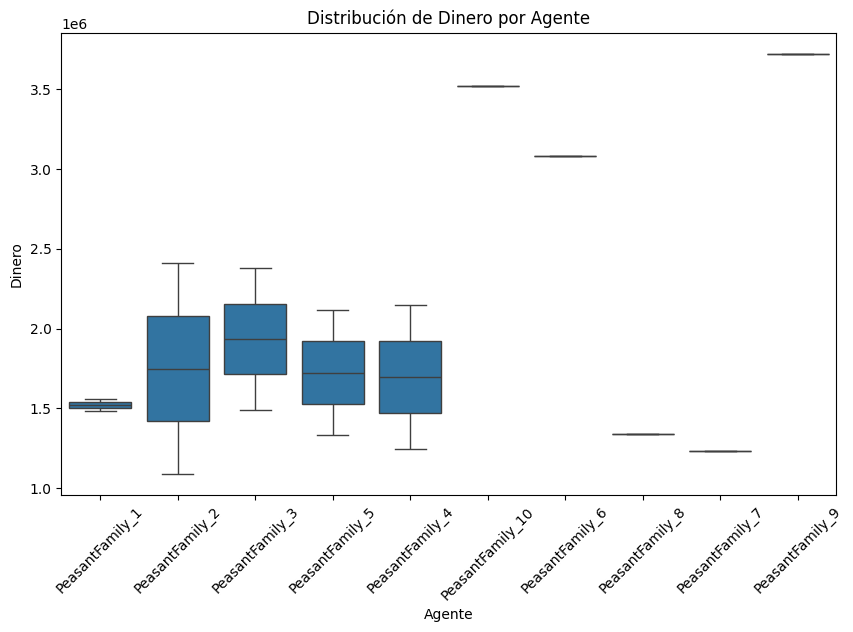

In [26]:
dfNOEmotions = procesar_archivos('test04NoEmotions/')
calculos(dfNOEmotions)
graficar(dfNOEmotions)

In [40]:
dfNOEmotions.to_csv("noemotions.csv")

In [43]:
dfNOEmotions

,peasantLeisureAffinity,peasantKind,contractor,pesticidesAvailable,purpose,tools,daysToWorkForOther,peasantFamilyLandAlias,robberyAccount,rainfallConditions,...,currentDay,Secure/Insecure,currentActivity,peasantFamilyAffinity,toPay,harvestedWeight,peasantFamilyHelper,nombre_agente,initialHealth,initialMoney
0,0.363516,StablePeasant,,0,farmer,10,0,farm_4_small,0,normal,...,352,0.8804,NONE,0.636154,0,0,,PeasantFamily_1,NaN,NaN
1,0.435718,StablePeasant,,0,farmer,10,0,farm_3_small,0,normal,...,345,0.9402,NONE,0.762507,0,0,,PeasantFamily_2,NaN,NaN
2,0.388552,StablePeasant,,0,farmer,10,0,farm_7_small,0,normal,...,345,0.9402,NONE,0.679967,0,0,,PeasantFamily_3,NaN,NaN
3,0.435155,StablePeasant,,0,farmer,10,0,farm_2_small,0,normal,...,352,0.8602,NONE,0.761521,0,0,,PeasantFamily_5,NaN,NaN
4,0.425492,StablePeasant,,0,farmer,10,0,farm_1_small,0,normal,...,352,0.9406,NONE,0.744610,0,0,,PeasantFamily_4,NaN,NaN
5,0.407095,StablePeasant,,0,farmer,10,0,farm_35_medium,0,normal,...,312,0.5218,NONE,0.712415,0,0,,PeasantFamily_10,101.0,2239020.0
6,0.422192,StablePeasant,,0,farmer,10,0,farm_40_small,0,normal,...,315,0.4708,NONE,0.738836,0,0,,PeasantFamily_4,105.0,2322055.0
7,0.370485,StablePeasant,,0,farmer,10,0,farm_49_small,0,normal,...,306,0.0776,NONE,0.648348,0,0,,PeasantFamily_5,85.0,2037665.0
8,0.432977,StablePeasant,,0,farmer,10,0,farm_10_large,0,normal,...,312,0.2974,NONE,0.757710,0,0,,PeasantFamily_6,108.0,2381375.0
9,0.393792,StablePeasant,,0,farmer,10,0,farm_68_small,0,normal,...,309,0.1718,NONE,0.689136,0,0,,PeasantFamily_1,96.0,2165856.0


Promedio por Agente:
 nombre_agente
PeasantFamily_1     9.702242e+05
PeasantFamily_10    1.118562e+06
PeasantFamily_2     8.108907e+05
PeasantFamily_3     9.221826e+05
PeasantFamily_4     9.534222e+05
PeasantFamily_5     1.320304e+06
PeasantFamily_6     8.297245e+05
PeasantFamily_7     8.097448e+05
PeasantFamily_8     7.972524e+05
PeasantFamily_9     8.153139e+05
Name: money, dtype: float64

Desviación Estándar por Agente:
 nombre_agente
PeasantFamily_1     545221.119046
PeasantFamily_10    551368.247709
PeasantFamily_2     216357.705416
PeasantFamily_3     345102.312874
PeasantFamily_4     582164.643848
PeasantFamily_5     759486.083077
PeasantFamily_6     246144.986567
PeasantFamily_7     473702.999623
PeasantFamily_8     398568.780936
PeasantFamily_9     208063.607413
Name: money, dtype: float64

Coeficiente de Variación por Agente (%):
 nombre_agente
PeasantFamily_1     56.195374
PeasantFamily_10    49.292586
PeasantFamily_2     26.681488
PeasantFamily_3     37.422341
PeasantFamily

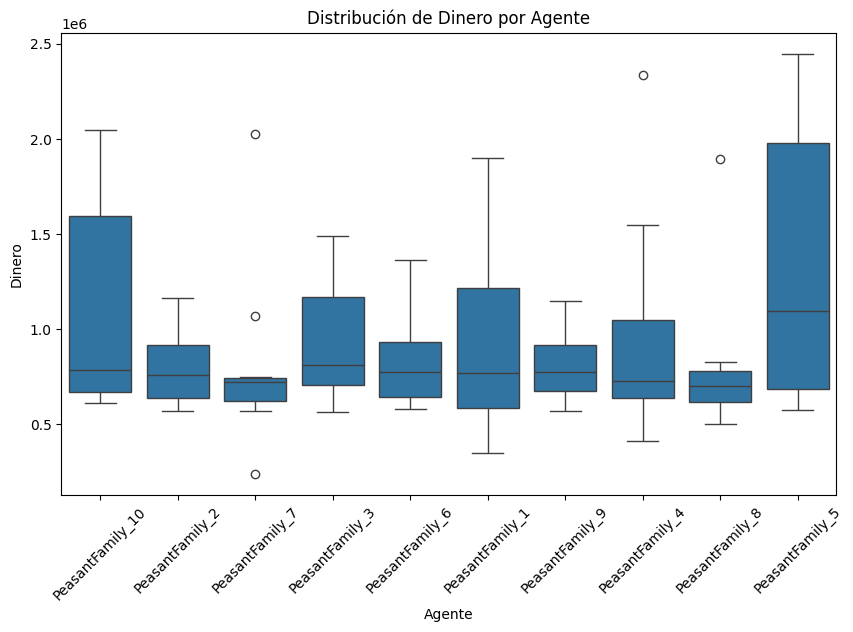

In [44]:
emotions = procesar_archivos('emotions/')
calculos(emotions)
graficar(emotions)

In [41]:
emotions.to_csv("emotions.csv")

In [46]:
emotions.describe()

,peasantLeisureAffinity,pesticidesAvailable,initialHealth,initialMoney,tools,daysToWorkForOther,robberyAccount,peasantFriendsAffinity,Happiness/Sadness,totalHarvestedWeight,...,cropSize,health,waterAvailable,loanAmountToPay,peasantFamilyMinimalVital,money,currentDay,Secure/Insecure,peasantFamilyAffinity,toPay
count,99.000000,99.0,99.000000,9.900000e+01,99.0,99.0,99.000000,99.000000,99.000000,99.000000,...,99.000000,99.000000,99.000000,99.0,99.0,9.900000e+01,99.000000,99.000000,99.000000,99.0
mean,0.398629,0.0,96.474747,2.192461e+06,10.0,0.0,0.060606,0.498287,0.980013,3857.602111,...,0.484848,96.474747,1614.575758,0.0,10000.0,9.329055e+05,315.696970,0.904821,0.697601,0.0
std,0.022887,0.0,8.762563,1.258761e+05,0.0,0.0,0.279145,0.028608,0.000047,2632.152906,...,0.502314,4.951486,606.599136,0.0,0.0,4.714933e+05,28.604786,0.032741,0.040052,0.0
min,0.360071,0.0,81.000000,1.980389e+06,10.0,0.0,0.000000,0.450088,0.979900,0.000000,...,0.000000,70.000000,245.000000,0.0,10000.0,2.390440e+05,288.000000,0.839900,0.630124,0.0
25%,0.381961,0.0,90.000000,2.100782e+06,10.0,0.0,0.000000,0.477451,0.980000,0.000000,...,0.000000,93.000000,1109.000000,0.0,10000.0,6.314395e+05,294.000000,0.869950,0.668431,0.0
50%,0.396497,0.0,98.000000,2.180732e+06,10.0,0.0,0.000000,0.495621,0.980000,5183.482393,...,0.000000,98.000000,1938.000000,0.0,10000.0,7.432640e+05,300.000000,0.900000,0.693870,0.0
75%,0.417493,0.0,104.000000,2.296208e+06,10.0,0.0,0.000000,0.521866,0.980000,5937.534806,...,1.000000,100.000000,1981.500000,0.0,10000.0,1.104739e+06,354.000000,0.940000,0.730612,0.0
max,0.439940,0.0,109.000000,2.419667e+06,10.0,0.0,2.000000,0.549924,0.980100,7343.534105,...,1.000000,100.000000,2099.000000,0.0,10000.0,2.448266e+06,366.000000,0.940200,0.769894,0.0


Promedio por Agente:
 nombre_agente
PeasantFamily_1     1.372094e+06
PeasantFamily_10    1.268745e+06
PeasantFamily_2     1.141645e+06
PeasantFamily_3     1.284195e+06
PeasantFamily_4     1.169848e+06
PeasantFamily_5     1.370299e+06
PeasantFamily_6     1.425127e+06
PeasantFamily_7     1.176114e+06
PeasantFamily_8     1.207599e+06
PeasantFamily_9     1.240910e+06
Name: money, dtype: float64

Desviación Estándar por Agente:
 nombre_agente
PeasantFamily_1     842812.514501
PeasantFamily_10    722399.685223
PeasantFamily_2     626134.591711
PeasantFamily_3     653863.893814
PeasantFamily_4     505685.801390
PeasantFamily_5     755777.411935
PeasantFamily_6     730880.321026
PeasantFamily_7     611972.158700
PeasantFamily_8     677665.518571
PeasantFamily_9     680029.283511
Name: money, dtype: float64

Coeficiente de Variación por Agente (%):
 nombre_agente
PeasantFamily_1     61.425254
PeasantFamily_10    56.938131
PeasantFamily_2     54.844968
PeasantFamily_3     50.916230
PeasantFamily

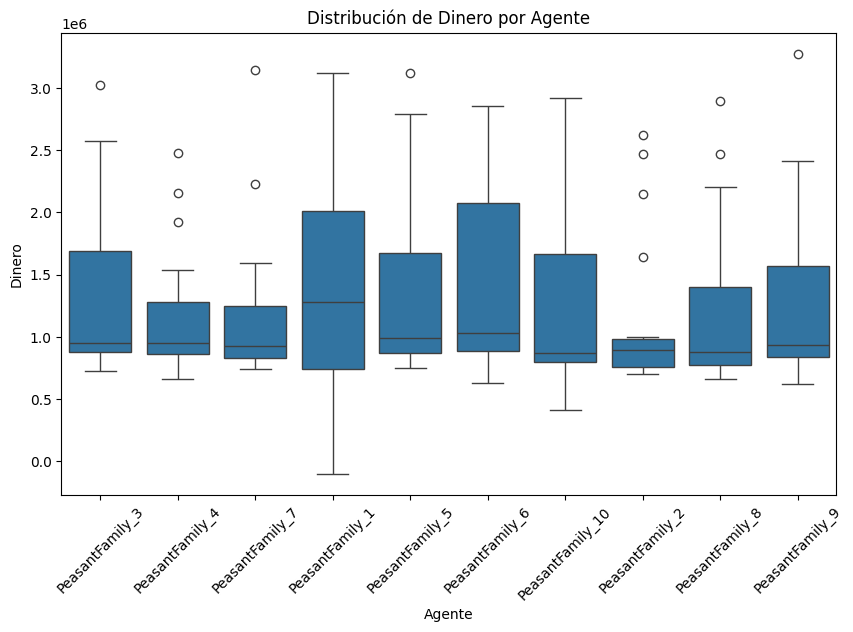

In [34]:
noemotions = procesar_archivos('noemotions/')
calculos(noemotions)
graficar(noemotions)

In [47]:
noemotions.columns

Index(['peasantLeisureAffinity', 'peasantKind', 'contractor',
       'pesticidesAvailable', 'initialHealth', 'purpose', 'initialMoney',
       'tools', 'daysToWorkForOther', 'peasantFamilyLandAlias',
       'robberyAccount', 'rainfallConditions', 'peasantFriendsAffinity',
       'assignedLands', 'Happiness/Sadness', 'farm', 'timeLeftOnDay',
       'Hopeful/Uncertainty', 'seeds', 'newDay', 'currentSeason', 'cropSize',
       'health', 'currentPeasantLeisureType', 'internalCurrentDate',
       'waterAvailable', 'loanAmountToPay', 'peasantFamilyMinimalVital',
       'money', 'currentDay', 'Secure/Insecure', 'currentActivity',
       'peasantFamilyAffinity', 'toPay', 'harvestedWeight',
       'peasantFamilyHelper', 'nombre_agente'],
      dtype='object')